# Importing needed libraries

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,roc_auc_score,roc_curve, confusion_matrix, accuracy_score
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.manifold import TSNE



import datetime as dt
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

# Importing Data

In [2]:
df_coupon_prediction = pd.read_csv('coupon/Coupon_prediction.csv') 
df_coupon_item_mapping = pd.read_csv('coupon/coupon_item_mapping.csv') 
df_customers_coupon_prediction_dataset = pd.read_csv('coupon/Customers_coupon_prediction_dataset.csv') 
df_customer_transaction_data = pd.read_csv('coupon/customer_transaction_data.csv') 
df_customer_demographics = pd.read_csv('coupon/customer_demographics.csv') 
df_main_train = pd.read_csv('coupon/train.csv') 

# Exploring dataframes

In [3]:
print(len(df_coupon_prediction))
df_coupon_prediction.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_coupon_prediction.head()

1095102


,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,...,selling_price,other_discount,coupon_discount,campaign_type,start_date,end_date,item_id_y,brand,brand_type,category
0,0,38795,8,537,1064,0,36-45,Married,0,2,...,141.77,0.0,0.0,X,16/02/13,05/04/13,9962,278,Established,Grocery
1,1,38795,8,537,1064,0,36-45,Married,0,2,...,141.77,0.0,0.0,X,16/02/13,05/04/13,29027,278,Established,Grocery
2,2,38795,8,537,1064,0,36-45,Married,0,2,...,141.77,0.0,0.0,X,16/02/13,05/04/13,30961,278,Established,Grocery
3,3,38795,8,537,1064,0,36-45,Married,0,2,...,141.77,0.0,0.0,X,16/02/13,05/04/13,37320,278,Established,Grocery
4,4,38795,8,537,1064,0,36-45,Married,0,2,...,141.77,0.0,0.0,X,16/02/13,05/04/13,39114,278,Established,Grocery


In [4]:
'''
Missing data and data types needs to be handled
'''

df_coupon_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095102 entries, 0 to 1095101
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   index              1095102 non-null  int64  
 1   id                 1095102 non-null  int64  
 2   campaign_id        1095102 non-null  int64  
 3   coupon_id          1095102 non-null  int64  
 4   customer_id        1095102 non-null  int64  
 5   redemption_status  1095102 non-null  int64  
 6   age_range          1095102 non-null  object 
 7   marital_status     833074 non-null   object 
 8   rented             1095102 non-null  int64  
 9   family_size        1095102 non-null  object 
 10  no_of_children     538412 non-null   object 
 11  income_bracket     1095102 non-null  int64  
 12  date               1095102 non-null  object 
 13  item_id_x          1095102 non-null  int64  
 14  quantity           1095102 non-null  int64  
 15  selling_price      1095102 non-n

In [5]:
df_coupon_item_mapping.head()

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


In [6]:
df_coupon_item_mapping[df_coupon_item_mapping['coupon_id'] == 105]

,coupon_id,item_id
0,105,37
605,105,2360
1957,105,9944
2492,105,13208
3130,105,17451
4232,105,24554
5119,105,30259
5451,105,32173
5976,105,35416
6794,105,39723


In [7]:
'''
Ftom the below view, item_id_y column is the one is mapped with df_coupon_item_mapping
We can take into considration dropping item_id_x column if it's not matched with any other data frame

'''

df_coupon_prediction[df_coupon_prediction['coupon_id'] == 105][['coupon_id','item_id_x','item_id_y']]

,coupon_id,item_id_x,item_id_y
1079811,105,65911,37
1079812,105,65911,2360
1079813,105,65911,9944
1079814,105,65911,13208
1079815,105,65911,17451
...,...,...,...
1080214,105,26697,59116
1080215,105,26697,59295
1080216,105,26697,64045
1080217,105,26697,64288


In [8]:
''' Check customers data'''
df_customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,NaN,4
1,6,46-55,Married,0,2,NaN,5
2,7,26-35,NaN,0,3,1,3
3,8,26-35,NaN,0,4,2,6
4,10,46-55,Single,0,1,NaN,5


In [9]:
''' 
Missing data and data types needs to be handld
'''

df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [10]:
df_customers_coupon_prediction_dataset.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
print(len(df_customers_coupon_prediction_dataset))
df_customers_coupon_prediction_dataset.head()

387760


,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,...,end_date,date,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
0,0,1,13,27,1053,0,46-55,NaN,0,1,...,05/07/13,2013-06-11,12795,1,42.39,0.00,0.0,56,Local,Grocery
1,1,1,13,27,1053,0,46-55,NaN,0,1,...,05/07/13,2012-06-24,45009,1,71.24,-35.26,0.0,56,Local,Natural Products
2,2,2444,13,513,1053,0,46-55,NaN,0,1,...,05/07/13,2013-06-11,12795,1,42.39,0.00,0.0,56,Local,Grocery
3,3,2444,13,513,1053,0,46-55,NaN,0,1,...,05/07/13,2012-06-24,45009,1,71.24,-35.26,0.0,56,Local,Natural Products
4,4,3651,13,166,1053,0,46-55,NaN,0,1,...,05/07/13,2013-06-11,12795,1,42.39,0.00,0.0,56,Local,Grocery


In [11]:
df_customers_coupon_prediction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387760 entries, 0 to 387759
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              387760 non-null  int64  
 1   id                 387760 non-null  int64  
 2   campaign_id        387760 non-null  int64  
 3   coupon_id          387760 non-null  int64  
 4   customer_id        387760 non-null  int64  
 5   redemption_status  387760 non-null  int64  
 6   age_range          387760 non-null  object 
 7   marital_status     231407 non-null  object 
 8   rented             387760 non-null  int64  
 9   family_size        387760 non-null  object 
 10  no_of_children     141145 non-null  object 
 11  income_bracket     387760 non-null  int64  
 12  campaign_type      387760 non-null  object 
 13  start_date         387760 non-null  object 
 14  end_date           387760 non-null  object 
 15  date               387760 non-null  object 
 16  it

In [12]:
df_customers_coupon_prediction_dataset[
    (df_customers_coupon_prediction_dataset['customer_id']== 1064)
    & (df_customers_coupon_prediction_dataset['coupon_id'] == 537)
]

,index,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,...,end_date,date,item_id,quantity,selling_price,other_discount,coupon_discount,brand,brand_type,category
126809,126809,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2013-02-23,17130,2,53.43,0.00,0.0,158,Established,Pharmaceutical
126810,126810,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2013-03-12,12824,1,78.01,-28.50,0.0,1451,Established,Pharmaceutical
126811,126811,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2012-05-05,56788,1,355.84,0.00,0.0,1918,Established,"Dairy, Juices & Snacks"
126812,126812,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2012-07-25,24862,1,18.52,0.00,0.0,56,Local,Grocery
126813,126813,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2013-04-14,5861,1,47.37,-2.14,0.0,2025,Established,Grocery
126814,126814,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2013-04-19,4418,1,89.05,-74.45,0.0,1143,Established,Grocery
126815,126815,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2013-04-24,30970,1,106.50,0.00,0.0,501,Established,Grocery
126816,126816,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2012-04-05,53608,1,131.44,0.00,0.0,4752,Established,"Dairy, Juices & Snacks"
126817,126817,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2013-01-09,35964,1,961.38,-71.24,0.0,686,Established,Pharmaceutical
126818,126818,38795,8,537,1064,0,36-45,Married,0,2,...,05/04/13,2012-10-01,49140,1,106.86,-21.02,0.0,4763,Established,Bakery


In [13]:
'''
As per the below comparison, all columns in both dataframes are almost matching, however df_coupon_prediction
has much many records than df_customers_coupon_prediction_dataset, so we will adhere to the first dataframe if needed

'''

print(df_customers_coupon_prediction_dataset.columns)
print(len(df_customers_coupon_prediction_dataset.columns))
print()
print(df_coupon_prediction.columns)
print(len(df_coupon_prediction.columns))

Index(['index', 'id', 'campaign_id', 'coupon_id', 'customer_id',
       'redemption_status', 'age_range', 'marital_status', 'rented',
       'family_size', 'no_of_children', 'income_bracket', 'campaign_type',
       'start_date', 'end_date', 'date', 'item_id', 'quantity',
       'selling_price', 'other_discount', 'coupon_discount', 'brand',
       'brand_type', 'category'],
      dtype='object')
24

Index(['index', 'id', 'campaign_id', 'coupon_id', 'customer_id',
       'redemption_status', 'age_range', 'marital_status', 'rented',
       'family_size', 'no_of_children', 'income_bracket', 'date', 'item_id_x',
       'quantity', 'selling_price', 'other_discount', 'coupon_discount',
       'campaign_type', 'start_date', 'end_date', 'item_id_y', 'brand',
       'brand_type', 'category'],
      dtype='object')
25


In [14]:
'''
selling price and disccounts are vary based on item id and quantity
'''

print(len(df_customer_transaction_data))
df_customer_transaction_data.head(20)

1324566


,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0
5,2012-01-02,1501,57397,1,71.24,-28.14,0.0
6,2012-01-02,857,12424,1,106.50,-14.25,0.0
7,2012-01-02,857,14930,1,110.07,0.00,0.0
8,2012-01-02,857,16657,1,89.05,-35.26,0.0
9,2012-01-02,67,10537,3,32.06,0.00,0.0


In [15]:
'''
coupun_discount means that the redemption has been done for this item
'''

df_customer_transaction_data[df_customer_transaction_data['coupon_discount']< 0]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
88,2012-01-02,464,5525,1,106.50,-35.62,-35.62
93,2012-01-02,464,8145,1,39.18,-24.58,-14.25
104,2012-01-02,464,16381,1,48.80,-14.96,-35.62
107,2012-01-02,464,17861,3,75.51,-32.06,-26.71
112,2012-01-02,464,19583,2,124.67,-45.59,-35.62
...,...,...,...,...,...,...,...
1324282,2013-07-03,384,12071,1,53.43,-26.71,-17.81
1324285,2013-07-03,384,22269,1,53.43,-26.71,-17.81
1324287,2013-07-03,384,33382,2,106.86,-53.43,-35.62
1324403,2013-07-03,1303,69686,1,78.36,0.00,-35.62


In [16]:
'''
This table  contain main data for coupon per campaign per customer ID and eaither it has been redeemed or not
'''

print(len(df_main_train))
df_main_train.head()

78369


,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [17]:
'''
The below shows huge variance (imbalanced data), so we need to take it into considration while train the model
'''

(df_main_train['redemption_status'].value_counts())/len(df_main_train)*100

0    99.069785
1     0.930215
Name: redemption_status, dtype: float64

### We will use train data table to be the base and will merge needed data with it

# 

#  <font color='green'> Data Cleaning & Feature Engineering </font> 

### <font color='red'>1 - Customer Data Frame </font> 

In [18]:
'''
We need to fill NaN data in marital_status and no_of_children  
And convert no_of_children & family_size into int data
'''

df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  431 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    object
 5   no_of_children  222 non-null    object
 6   income_bracket  760 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 41.7+ KB


In [19]:
'''
We need to change all 5+ to be 5 and convert the column data type into int
'''

df_customer_demographics['family_size'] = df_customer_demographics['family_size'].apply(lambda x: str(x).strip())
df_customer_demographics['family_size'] = df_customer_demographics.family_size.apply(lambda x: str(x).replace('+', ''))
df_customer_demographics['family_size'] = df_customer_demographics['family_size'].astype(float).astype(int)

print(df_customer_demographics['family_size'].isnull().sum())

df_customer_demographics['family_size'].value_counts()

0


2    303
1    248
3    104
5     57
4     48
Name: family_size, dtype: int64

In [20]:
'''
Smae should be applied to total children, cange 3+ to be 3
but first we need to convert all nan values into 0
'''

df_customer_demographics['no_of_children'] = df_customer_demographics['no_of_children'].apply(lambda x: str(x).strip())
df_customer_demographics['no_of_children'] = df_customer_demographics['no_of_children'].replace('nan', 0)
df_customer_demographics['no_of_children'] = df_customer_demographics.no_of_children.apply(lambda x: str(x).replace('+',''))
df_customer_demographics['no_of_children'] = df_customer_demographics['no_of_children'].astype(float).astype(int)

print(df_customer_demographics['no_of_children'].isnull().sum())

df_customer_demographics['no_of_children'].value_counts()

0


0    538
1    107
3     60
2     55
Name: no_of_children, dtype: int64

In [21]:
'''
All nan in marital_status with count of family_size = 1, will be Single
All nan in marital_status with count of family_size >= 1 will be Married
All nan in marital_status with count of no_of_children >= 1 will be Married
'''

print('Missing values before:', df_customer_demographics['marital_status'].isnull().sum())

df_customer_demographics.loc[(df_customer_demographics['marital_status'].isnull()) & (df_customer_demographics.family_size == 1),'marital_status'] = 'Single'
df_customer_demographics.loc[(df_customer_demographics['marital_status'].isnull()) & (df_customer_demographics.no_of_children >= 1),'marital_status'] = 'Married'
df_customer_demographics.loc[(df_customer_demographics['marital_status'].isnull()) & (df_customer_demographics.family_size == 2),'marital_status'] = 'Married'

print('Missing values after:', df_customer_demographics['marital_status'].isnull().sum())



Missing values before: 329
Missing values after: 0


In [22]:
df_customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     760 non-null    int64 
 1   age_range       760 non-null    object
 2   marital_status  760 non-null    object
 3   rented          760 non-null    int64 
 4   family_size     760 non-null    int32 
 5   no_of_children  760 non-null    int32 
 6   income_bracket  760 non-null    int64 
dtypes: int32(2), int64(3), object(2)
memory usage: 35.8+ KB


In [23]:
df_customer_demographics.head(10)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,70+,Married,0,2,0,4
1,6,46-55,Married,0,2,0,5
2,7,26-35,Married,0,3,1,3
3,8,26-35,Married,0,4,2,6
4,10,46-55,Single,0,1,0,5
5,11,70+,Single,0,2,0,1
6,12,46-55,Married,0,2,0,7
7,13,36-45,Single,0,1,0,2
8,14,26-35,Married,1,2,0,6
9,15,46-55,Married,0,2,0,6


### Cusrtomer Segmentation using K means

In [24]:
print(df_customer_demographics['marital_status'].unique())
print(df_customer_demographics['age_range'].unique())

['Married' 'Single']
['70+' '46-55' '26-35' '36-45' '18-25' '56-70']


In [25]:
''' Use LabelEncoder on categorical data to convert them into numbers'''

le_marital_status = LabelEncoder()
le_age_range = LabelEncoder()

df_customer_demographics['marital_status'] = le_marital_status.fit_transform(df_customer_demographics['marital_status'])
df_customer_demographics['age_range'] = le_age_range.fit_transform(df_customer_demographics['age_range'])

print(df_customer_demographics['marital_status'].unique())
print(df_customer_demographics['age_range'].unique())

[0 1]
[5 3 1 2 0 4]


In [26]:
df_customer_demographics.head()

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,5,0,0,2,0,4
1,6,3,0,0,2,0,5
2,7,1,0,0,3,1,3
3,8,1,0,0,4,2,6
4,10,3,1,0,1,0,5


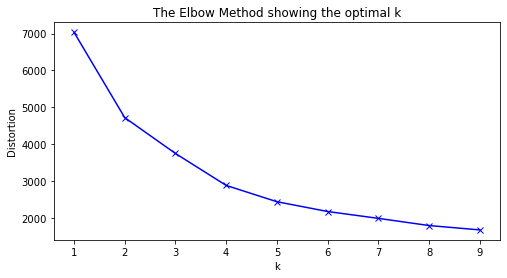

In [27]:
'''Identify number of K by checking Elbow method''' 

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_customer_demographics.drop('customer_id', axis = 1))
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(8,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [28]:
''' Based on the above graph we will use 4 clusters while creating customer segmentation'''

km = KMeans(n_clusters=4,max_iter=300,random_state=42)
segment = km.fit_predict(df_customer_demographics.drop('customer_id', axis = 1))


In [29]:
df_customer_demographics['segment'] = segment
df_customer_demographics.head(10)

,customer_id,age_range,marital_status,rented,family_size,no_of_children,income_bracket,segment
0,1,5,0,0,2,0,4,1
1,6,3,0,0,2,0,5,1
2,7,1,0,0,3,1,3,2
3,8,1,0,0,4,2,6,2
4,10,3,1,0,1,0,5,1
5,11,5,1,0,2,0,1,3
6,12,3,0,0,2,0,7,1
7,13,2,1,0,1,0,2,3
8,14,1,0,1,2,0,6,1
9,15,3,0,0,2,0,6,1


<AxesSubplot:xlabel='component1', ylabel='component2'>

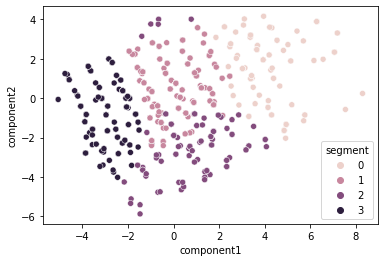

In [30]:
'''Ploting customer segmentation'''

embedding = MDS(n_components=2)
mds = pd.DataFrame(embedding.fit_transform(df_customer_demographics.drop(['customer_id','segment'],axis=1)),
             columns = ['component1','component2'])
mds['segment'] = km.predict(df_customer_demographics.drop(['customer_id','segment'],axis=1))

sns.scatterplot(data=mds,x = "component1",y="component2",hue="segment")

In [31]:
''' Map Customer data with df_main_train'''

df_main_train = df_main_train.merge(df_customer_demographics, how='left')
print(len(df_main_train))
df_main_train.head()

78369


,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,segment
0,1,13,27,1053,0,3.0,1.0,0.0,1.0,0.0,5.0,1.0
1,2,13,116,48,0,2.0,0.0,0.0,2.0,0.0,3.0,3.0
2,6,9,635,205,0,3.0,0.0,0.0,2.0,0.0,7.0,1.0
3,7,13,644,1050,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,8,1017,1489,0,3.0,0.0,0.0,2.0,0.0,3.0,3.0


In [32]:
'''Some cusotmers are not available in df_customer_demographics, with total 34,708  records, 
so we need to drop these records from df_main_train'''

print(df_main_train['age_range'].isnull().sum())

df_main_train[df_main_train['age_range'].isnull()]['customer_id'].unique()

34708


array([1050,  523,  761, 1255,   63,   88, 1095, 1096,  919,   91, 1447,
        661,  680,  883, 1366,  578,  895, 1351, 1162,  200,  341,  998,
       1418,  321,  372,  659,  340, 1044,  435,  741, 1214,  166,  278,
        379, 1005, 1241,  814,  638, 1582,  310,   95, 1232,  640, 1029,
        644,  526,   80, 1174, 1099, 1118,  582, 1233, 1369,  736,   44,
       1306,  900,  538,  106, 1229,  206,  992, 1307,  532,  403,  718,
        176,  866, 1173,  125,  694, 1462,  430, 1236, 1199, 1446, 1158,
       1183, 1426,  273,  727, 1074,  654, 1348,  324,  130,  639, 1315,
       1006, 1285,  954,  117,  531, 1212,  437,  973, 1429, 1372,  790,
       1238,  764, 1267,  344,   56, 1368,  594, 1234,  420, 1146,  820,
       1563, 1039,  956, 1419,  448,  477, 1497,  301,  819, 1549, 1200,
        445, 1445,  302,  413,  689, 1389,  969,  852,  815,  768, 1474,
        152,  433,   43, 1481,  854, 1084,  651,  953,  996,  387, 1411,
        862,  439, 1358, 1554,  734,  633,  478,  4

In [33]:
df_main_train = df_main_train[df_main_train['age_range'].notnull()]
print(len(df_main_train))
df_main_train.head(10)

43661


,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,income_bracket,segment
0,1,13,27,1053,0,3.0,1.0,0.0,1.0,0.0,5.0,1.0
1,2,13,116,48,0,2.0,0.0,0.0,2.0,0.0,3.0,3.0
2,6,9,635,205,0,3.0,0.0,0.0,2.0,0.0,7.0,1.0
4,9,8,1017,1489,0,3.0,0.0,0.0,2.0,0.0,3.0,3.0
5,11,11,795,793,0,3.0,0.0,0.0,2.0,1.0,5.0,1.0
6,14,9,444,590,0,2.0,0.0,0.0,2.0,0.0,1.0,3.0
7,15,29,538,368,0,2.0,1.0,0.0,1.0,0.0,5.0,1.0
9,19,2,559,679,0,2.0,1.0,1.0,2.0,0.0,4.0,1.0
10,20,9,575,108,0,3.0,1.0,0.0,1.0,0.0,5.0,1.0
11,21,13,1028,89,0,3.0,1.0,0.0,1.0,0.0,3.0,3.0


# 

### <font color='red'>2 - Coupon Item Mapping </font> 

In [34]:
print(len(df_coupon_item_mapping))
df_coupon_item_mapping.head(10).sort_values('coupon_id')

92663


,coupon_id,item_id
0,105,37
1,107,75
2,494,76
4,518,77
9,518,81
5,520,77
3,522,77
8,522,81
7,524,77
6,529,77


In [35]:
'''We need map each item_id with brand type and category form df_coupon_prediction'''

item_data = df_coupon_prediction[['item_id_y', 'brand_type', 'category']]
item_data = item_data.drop_duplicates(subset=['item_id_y'])
item_data.rename(columns = {'item_id_y':'item_id'}, inplace = True)
print(len(item_data))



32240


In [36]:
item_data.head(10).sort_values('item_id')

,item_id,brand_type,category
171,1238,Established,Grocery
0,9962,Established,Grocery
1,29027,Established,Grocery
2,30961,Established,Grocery
3,37320,Established,Grocery
4,39114,Established,Grocery
5,39767,Established,Grocery
6,39823,Established,Grocery
7,39988,Established,Grocery
8,40559,Established,Grocery


In [37]:
'''label encoding brand_type'''


print(item_data['brand_type'].unique())
dummy = pd.get_dummies(item_data.brand_type, prefix='barnd_')
item_data = pd.concat([item_data, dummy], axis=1)

item_data.head()



['Established' 'Local']


,item_id,brand_type,category,barnd__Established,barnd__Local
0,9962,Established,Grocery,1,0
1,29027,Established,Grocery,1,0
2,30961,Established,Grocery,1,0
3,37320,Established,Grocery,1,0
4,39114,Established,Grocery,1,0


In [38]:
'''get_dummies category'''


dum = pd.get_dummies(item_data.category, prefix='cat_')
item_data = pd.concat([item_data, dum], axis=1)


item_data.head(10)

,item_id,brand_type,category,barnd__Established,barnd__Local,cat__Bakery,"cat__Dairy, Juices & Snacks",cat__Flowers & Plants,cat__Garden,cat__Grocery,...,cat__Miscellaneous,cat__Natural Products,cat__Packaged Meat,cat__Pharmaceutical,cat__Prepared Food,cat__Salads,cat__Seafood,cat__Skin & Hair Care,cat__Travel,cat__Vegetables (cut)
0,9962,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,29027,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,30961,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,37320,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,39114,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,39767,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,39823,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,39988,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,40559,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171,1238,Established,Grocery,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
'''Drop brand_type and category columns'''

item_data = item_data.drop(['brand_type', 'category'], axis = 1)
item_data.head()

,item_id,barnd__Established,barnd__Local,cat__Bakery,"cat__Dairy, Juices & Snacks",cat__Flowers & Plants,cat__Garden,cat__Grocery,cat__Meat,cat__Miscellaneous,cat__Natural Products,cat__Packaged Meat,cat__Pharmaceutical,cat__Prepared Food,cat__Salads,cat__Seafood,cat__Skin & Hair Care,cat__Travel,cat__Vegetables (cut)
0,9962,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,29027,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,30961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,37320,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,39114,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [40]:
'''Now we merge both item data, and coupon item mapping df'''

df_items = df_coupon_item_mapping.merge(item_data, how = 'left')
print(len(df_items))
df_items.head(10)

92663


,coupon_id,item_id,barnd__Established,barnd__Local,cat__Bakery,"cat__Dairy, Juices & Snacks",cat__Flowers & Plants,cat__Garden,cat__Grocery,cat__Meat,cat__Miscellaneous,cat__Natural Products,cat__Packaged Meat,cat__Pharmaceutical,cat__Prepared Food,cat__Salads,cat__Seafood,cat__Skin & Hair Care,cat__Travel,cat__Vegetables (cut)
0,105,37,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,107,75,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,494,76,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,522,77,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,518,77,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,520,77,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,529,77,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,524,77,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,522,81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,518,81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
'''Creat df with coupon id and sum of each brand and category typ'''

df_coupon_group = df_items.groupby('coupon_id').agg(
    barnd_Established =  ('barnd__Established', 'sum'), barnd_Local =  ('barnd__Local', 'sum'),
    cat_Bakery =  ('cat__Bakery', 'sum'), cat_Dairy_Juices_Snacks =  ('cat__Dairy, Juices & Snacks', 'sum'),
    cat_Flowers_Plants =  ('cat__Flowers & Plants', 'sum'), cat_Garden =  ('cat__Garden', 'sum'),
    cat_Grocery =  ('cat__Grocery', 'sum'), cat_Meat =  ('cat__Meat', 'sum'),
    cat_Miscellaneous =  ('cat__Miscellaneous', 'sum'), cat_Natural_Products =  ('cat__Natural Products', 'sum'),
    cat_Packaged_Meat =  ('cat__Packaged Meat', 'sum'), cat_Pharmaceutical =  ('cat__Pharmaceutical', 'sum'),
    cat_Prepared_Food =  ('cat__Prepared Food', 'sum'), cat_Salads =  ('cat__Salads', 'sum'),
    cat_Seafood =  ('cat__Seafood', 'sum'), cat_Skin_Hair_Care =  ('cat__Skin & Hair Care', 'sum'),
    cat_Travel =  ('cat__Travel', 'sum'), cat_Vegetables =  ('cat__Vegetables (cut)', 'sum'),
                                                   ).reset_index()

print(len(df_coupon_group))
df_coupon_group.head(10)

1116


,coupon_id,barnd_Established,barnd_Local,cat_Bakery,cat_Dairy_Juices_Snacks,cat_Flowers_Plants,cat_Garden,cat_Grocery,cat_Meat,cat_Miscellaneous,cat_Natural_Products,cat_Packaged_Meat,cat_Pharmaceutical,cat_Prepared_Food,cat_Salads,cat_Seafood,cat_Skin_Hair_Care,cat_Travel,cat_Vegetables
0,1,39.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,17.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,24.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,3075.0,638.0,0.0,259.0,0.0,0.0,3082.0,2.0,0.0,0.0,242.0,0.0,0.0,0.0,128.0,0.0,0.0,0.0
6,7,2753.0,189.0,3.0,224.0,642.0,94.0,17.0,0.0,37.0,1880.0,2.0,4.0,1.0,18.0,3.0,0.0,10.0,7.0
7,8,3381.0,337.0,0.0,0.0,0.0,0.0,8.0,2029.0,15.0,0.0,1661.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0
8,9,926.0,609.0,0.0,1.0,0.0,0.0,1530.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
9,10,11.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
''' Merge the data with df_main_train'''

df_main_train = df_main_train.merge(df_coupon_group, how='left')
print(len(df_main_train))
df_main_train.head(10)

43661


,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,cat_Miscellaneous,cat_Natural_Products,cat_Packaged_Meat,cat_Pharmaceutical,cat_Prepared_Food,cat_Salads,cat_Seafood,cat_Skin_Hair_Care,cat_Travel,cat_Vegetables
0,1,13,27,1053,0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,13,116,48,0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,9,635,205,0,3.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,8,1017,1489,0,3.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,11,795,793,0,3.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
5,14,9,444,590,0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,15,29,538,368,0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,19,2,559,679,0,2.0,1.0,1.0,2.0,0.0,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20,9,575,108,0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,21,13,1028,89,0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color='red'>3 - Campaign Data</font> 

In [43]:
''' We need to get campaign data from '''

df_campaign = df_coupon_prediction[['campaign_id', 'campaign_type', 'start_date', 'end_date']]
print(len(df_campaign))
df_campaign.head(10)

1095102


,campaign_id,campaign_type,start_date,end_date
0,8,X,16/02/13,05/04/13
1,8,X,16/02/13,05/04/13
2,8,X,16/02/13,05/04/13
3,8,X,16/02/13,05/04/13
4,8,X,16/02/13,05/04/13
5,8,X,16/02/13,05/04/13
6,8,X,16/02/13,05/04/13
7,8,X,16/02/13,05/04/13
8,8,X,16/02/13,05/04/13
9,8,X,16/02/13,05/04/13


In [44]:
'''Drop duplicate rows'''

df_campaign = df_campaign.drop_duplicates(keep='first').sort_values('campaign_id').reset_index()
df_campaign.drop('index', axis = 1, inplace=True)
print(len(df_campaign))
df_campaign.head(30)

18


,campaign_id,campaign_type,start_date,end_date
0,1,Y,12/12/12,18/01/13
1,2,Y,17/12/12,18/01/13
2,3,Y,22/12/12,16/02/13
3,4,Y,07/01/13,08/02/13
4,5,Y,12/01/13,15/02/13
5,6,Y,28/01/13,01/03/13
6,7,Y,02/02/13,08/03/13
7,8,X,16/02/13,05/04/13
8,9,Y,11/03/13,12/04/13
9,10,Y,08/04/13,10/05/13


In [45]:
'''
We need to convert start date and end date columns into date type
Calculate campaign duration in days
get start and end months
label encoding for campaign type
'''

df_campaign['start_date'] = pd.to_datetime(df_campaign['start_date'])
df_campaign['end_date'] = pd.to_datetime(df_campaign['end_date'])

df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    18 non-null     int64         
 1   campaign_type  18 non-null     object        
 2   start_date     18 non-null     datetime64[ns]
 3   end_date       18 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 704.0+ bytes


In [46]:
''' 
Invalid start and end date for campaign_id 5 ,6, 13 & 26
campaign_id 5: will change start date to be in year 2012 as 
for the rest of three campaign will replace start date with end date and vise versa
'''

df_campaign['campaign_duration'] = (df_campaign['end_date'] - df_campaign['start_date']).dt.days
df_campaign.head(18)

,campaign_id,campaign_type,start_date,end_date,campaign_duration
0,1,Y,2012-12-12,2013-01-18,37
1,2,Y,2012-12-17,2013-01-18,32
2,3,Y,2012-12-22,2013-02-16,56
3,4,Y,2013-07-01,2013-08-02,32
4,5,Y,2013-12-01,2013-02-15,-289
5,6,Y,2013-01-28,2013-01-03,-25
6,7,Y,2013-02-02,2013-08-03,182
7,8,X,2013-02-16,2013-05-04,77
8,9,Y,2013-11-03,2013-12-04,31
9,10,Y,2013-08-04,2013-10-05,62


In [47]:
df_campaign.loc[df_campaign.campaign_id == 5, 'start_date'] = '2012-12-01'

df_campaign.loc[df_campaign.campaign_id == 6, 'start_date'] = '2013-01-03'
df_campaign.loc[df_campaign.campaign_id == 6, 'end_date'] = '2013-01-28'

df_campaign.loc[df_campaign.campaign_id == 13, 'start_date'] = '2013-05-07'
df_campaign.loc[df_campaign.campaign_id == 13, 'end_date'] = '2013-05-19'

df_campaign.loc[df_campaign.campaign_id == 26, 'start_date'] = '2012-09-21'
df_campaign.loc[df_campaign.campaign_id == 26, 'end_date'] = '2012-12-08'

In [48]:
df_campaign['campaign_duration'] = (df_campaign['end_date'] - df_campaign['start_date']).dt.days
df_campaign.head(18)

,campaign_id,campaign_type,start_date,end_date,campaign_duration
0,1,Y,2012-12-12,2013-01-18,37
1,2,Y,2012-12-17,2013-01-18,32
2,3,Y,2012-12-22,2013-02-16,56
3,4,Y,2013-07-01,2013-08-02,32
4,5,Y,2012-12-01,2013-02-15,76
5,6,Y,2013-01-03,2013-01-28,25
6,7,Y,2013-02-02,2013-08-03,182
7,8,X,2013-02-16,2013-05-04,77
8,9,Y,2013-11-03,2013-12-04,31
9,10,Y,2013-08-04,2013-10-05,62


In [49]:
df_campaign['start_month'] = pd.DatetimeIndex(df_campaign['start_date']).month
df_campaign['end_month'] = pd.DatetimeIndex(df_campaign['end_date']).month

In [50]:
le_camp_type = LabelEncoder()

print(df_campaign['campaign_type'].unique())

df_campaign['campaign_type'] = le_camp_type.fit_transform(df_campaign['campaign_type'])

print(df_campaign['campaign_type'].unique())

['Y' 'X']
[1 0]


In [51]:
df_campaign.head()

,campaign_id,campaign_type,start_date,end_date,campaign_duration,start_month,end_month
0,1,1,2012-12-12,2013-01-18,37,12,1
1,2,1,2012-12-17,2013-01-18,32,12,1
2,3,1,2012-12-22,2013-02-16,56,12,2
3,4,1,2013-07-01,2013-08-02,32,7,8
4,5,1,2012-12-01,2013-02-15,76,12,2


In [52]:
'''Merge df_campaign with df_main_train'''

df_main_train = df_main_train.merge(df_campaign, how ='left')
print(len(df_main_train))
df_main_train.head()

43661


,id,campaign_id,coupon_id,customer_id,redemption_status,age_range,marital_status,rented,family_size,no_of_children,...,cat_Seafood,cat_Skin_Hair_Care,cat_Travel,cat_Vegetables,campaign_type,start_date,end_date,campaign_duration,start_month,end_month
0,1,13,27,1053,0,3.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,2013-05-07,2013-05-19,12,5,5
1,2,13,116,48,0,2.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0,2013-05-07,2013-05-19,12,5,5
2,6,9,635,205,0,3.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1,2013-11-03,2013-12-04,31,11,12
3,9,8,1017,1489,0,3.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0,2013-02-16,2013-05-04,77,2,5
4,11,11,795,793,0,3.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1,2013-04-22,2013-07-06,75,4,7


In [53]:
df_main_train = df_main_train.drop(['start_date', 'end_date'], axis = 1)

### <font color='red'>4 - Price and Discount</font> 

In [54]:
'''
We will get selling_price, other_discount, coupon_discount from df_customers_coupon_prediction_dataset
We need to take into considraton the quantity as those amount should be divided by total items
Also we need to get unique data based on date column to avoid any repeated transaction
'''
df_amount = df_customers_coupon_prediction_dataset[['campaign_id','coupon_id', 'customer_id', 'date', 'quantity'
                                 ,'selling_price', 'other_discount' ,'coupon_discount']]

len(df_amount)

387760

In [55]:
df_amount = df_amount.drop_duplicates(subset=['campaign_id','coupon_id', 'customer_id', 'date'], keep='first').reset_index(drop = True)
df_amount.head()

,campaign_id,coupon_id,customer_id,date,quantity,selling_price,other_discount,coupon_discount
0,13,27,1053,2013-06-11,1,42.39,0.00,0.0
1,13,27,1053,2012-06-24,1,71.24,-35.26,0.0
2,13,513,1053,2013-06-11,1,42.39,0.00,0.0
3,13,513,1053,2012-06-24,1,71.24,-35.26,0.0
4,13,166,1053,2013-06-11,1,42.39,0.00,0.0


In [56]:
df_amount['selling_price_item'] = df_amount['selling_price'] /df_amount['quantity'] 
df_amount['other_discount_item'] = df_amount['other_discount'] /df_amount['quantity'] 
df_amount['coupon_discount_item'] = df_amount['coupon_discount'] /df_amount['quantity']
df_amount = df_amount.drop(['selling_price', 'quantity', 'other_discount', 'coupon_discount'], axis = 1)
df_amount.head(10)

,campaign_id,coupon_id,customer_id,date,selling_price_item,other_discount_item,coupon_discount_item
0,13,27,1053,2013-06-11,42.39,0.00,0.0
1,13,27,1053,2012-06-24,71.24,-35.26,0.0
2,13,513,1053,2013-06-11,42.39,0.00,0.0
3,13,513,1053,2012-06-24,71.24,-35.26,0.0
4,13,166,1053,2013-06-11,42.39,0.00,0.0
5,13,166,1053,2012-06-24,71.24,-35.26,0.0
6,13,766,1053,2013-06-11,42.39,0.00,0.0
7,13,766,1053,2012-06-24,71.24,-35.26,0.0
8,13,165,1053,2013-06-11,42.39,0.00,0.0
9,13,165,1053,2012-06-24,71.24,-35.26,0.0


In [57]:
df_amount_sum = df_amount.groupby(['campaign_id', 'coupon_id', 'customer_id']).agg(
    sell_price =('selling_price_item', 'sum'), other_discount =('other_discount_item', 'sum'),
    coupon_discount =('coupon_discount_item', 'sum')
                                                                              ).reset_index()

df_amount_sum.head(15)

,campaign_id,coupon_id,customer_id,sell_price,other_discount,coupon_discount
0,1,312,72,629.040000,-196.620000,0.0
1,1,312,401,370.450000,-30.630000,0.0
2,1,312,595,693.691667,-62.165000,0.0
3,1,312,797,606.250000,-178.810000,0.0
4,1,312,930,381.205819,-96.530153,0.0
5,1,312,1387,744.100000,-122.540000,0.0
6,1,442,72,629.040000,-196.620000,0.0
7,1,442,401,370.450000,-30.630000,0.0
8,1,442,595,693.691667,-62.165000,0.0
9,1,442,797,606.250000,-178.810000,0.0


In [58]:
'''Merge with df_main_train'''

df_main_train = pd.merge(df_main_train, df_amount_sum, how='left', on=['campaign_id', 'coupon_id', 'customer_id'])

In [59]:
df_main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43661 entries, 0 to 43660
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       43661 non-null  int64  
 1   campaign_id              43661 non-null  int64  
 2   coupon_id                43661 non-null  int64  
 3   customer_id              43661 non-null  int64  
 4   redemption_status        43661 non-null  int64  
 5   age_range                43661 non-null  float64
 6   marital_status           43661 non-null  float64
 7   rented                   43661 non-null  float64
 8   family_size              43661 non-null  float64
 9   no_of_children           43661 non-null  float64
 10  income_bracket           43661 non-null  float64
 11  segment                  43661 non-null  float64
 12  barnd_Established        43661 non-null  float64
 13  barnd_Local              43661 non-null  float64
 14  cat_Bakery            

In [60]:
'''Drop null rows 592 in total'''

df_main_train = df_main_train[df_main_train['other_discount'].notnull()]
len(df_main_train)

43069

In [61]:
'''Convert other_discount & coupon_discount into positve number'''

df_main_train['other_discount'] = df_main_train['other_discount'].abs()
df_main_train['coupon_discount'] = df_main_train['coupon_discount'].abs()

#  <font color='green'> Model Selection </font> 

In [529]:
df_ml = df_main_train.drop(['id', 'campaign_id', 'coupon_id', 'customer_id'], axis =1).astype(int)

In [530]:
df_ml.columns

Index(['redemption_status', 'age_range', 'marital_status', 'rented',
       'family_size', 'no_of_children', 'income_bracket', 'segment',
       'barnd_Established', 'barnd_Local', 'cat_Bakery',
       'cat_Dairy_Juices_Snacks', 'cat_Flowers_Plants', 'cat_Garden',
       'cat_Grocery', 'cat_Meat', 'cat_Miscellaneous', 'cat_Natural_Products',
       'cat_Packaged_Meat', 'cat_Pharmaceutical', 'cat_Prepared_Food',
       'cat_Salads', 'cat_Seafood', 'cat_Skin_Hair_Care', 'cat_Travel',
       'cat_Vegetables', 'campaign_type', 'campaign_duration', 'start_month',
       'end_month', 'sell_price', 'other_discount', 'coupon_discount'],
      dtype='object')

In [531]:
df_ml =df_ml.drop([ 'cat_Bakery',
       'cat_Dairy_Juices_Snacks', 'cat_Flowers_Plants', 'cat_Garden',
       'cat_Grocery', 'cat_Meat', 'cat_Miscellaneous', 'cat_Natural_Products',
       'cat_Packaged_Meat', 'cat_Pharmaceutical', 'cat_Prepared_Food',
       'cat_Salads', 'cat_Seafood', 'cat_Skin_Hair_Care', 'cat_Travel',
       'cat_Vegetables'], axis =1).astype(int)


In [532]:
#df_ml['final_price'] = df_ml['sell_price'] - (df_ml['other_discount'] + df_ml['coupon_discount'])
#df_ml =df_ml.drop([ 'sell_price','other_discount', 'coupon_discount'], axis =1).astype(int)
df_ml =df_ml.drop([ 'start_month','end_month'], axis =1).astype(int)
df_ml =df_ml.drop([ 'age_range', 'family_size', 'income_bracket','rented'], axis =1).astype(int)

 


In [533]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43069 entries, 0 to 43660
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   redemption_status  43069 non-null  int32
 1   marital_status     43069 non-null  int32
 2   no_of_children     43069 non-null  int32
 3   segment            43069 non-null  int32
 4   barnd_Established  43069 non-null  int32
 5   barnd_Local        43069 non-null  int32
 6   campaign_type      43069 non-null  int32
 7   campaign_duration  43069 non-null  int32
 8   sell_price         43069 non-null  int32
 9   other_discount     43069 non-null  int32
 10  coupon_discount    43069 non-null  int32
dtypes: int32(11)
memory usage: 2.1 MB


In [491]:
df_ml.head()

,redemption_status,marital_status,no_of_children,segment,barnd_Established,barnd_Local,cat_Grocery,cat_Pharmaceutical,campaign_duration,sell_price,other_discount,coupon_discount
0,0,1,0,1,125,0,125,0,12,113,35,0
1,0,0,0,3,0,3,3,0,12,1110,106,106
2,0,0,0,1,67,0,0,67,31,394,0,0
3,0,0,0,3,32,0,32,0,77,254,0,0
4,0,0,1,1,13,0,0,13,75,1211,232,0


In [534]:
'''We need to apply StandardScaler on columns that have max values > 1'''

col =[]

for i in range(len(df_ml.columns)):
    if df_ml[df_ml.columns[i]].max() >1:
        print(df_ml.columns[i]," : min -> ",df_ml[df_ml.columns[i]].min()," | max -> ", df_ml[df_ml.columns[i]].max())
        col.append(df_ml.columns[i])
    

no_of_children  : min ->  0  | max ->  3
segment  : min ->  0  | max ->  3
barnd_Established  : min ->  0  | max ->  10744
barnd_Local  : min ->  0  | max ->  1171
campaign_duration  : min ->  12  | max ->  182
sell_price  : min ->  0  | max ->  5094
other_discount  : min ->  0  | max ->  1523
coupon_discount  : min ->  0  | max ->  249


In [535]:
print(col)

['no_of_children', 'segment', 'barnd_Established', 'barnd_Local', 'campaign_duration', 'sell_price', 'other_discount', 'coupon_discount']


In [536]:
'''Split the data'''

df1= df_ml.copy()

X = df1.drop(['redemption_status'], axis =1)
y = df1['redemption_status']



In [537]:
#X_TSNE = TSNE().fit_transform(X)
#vis_x = X_TSNE[:, 0]
#vis_y = X_TSNE[:, 1]

#kmeans = KMeans(random_state=0).fit(X)
#clusters = kmeans.predict(X)


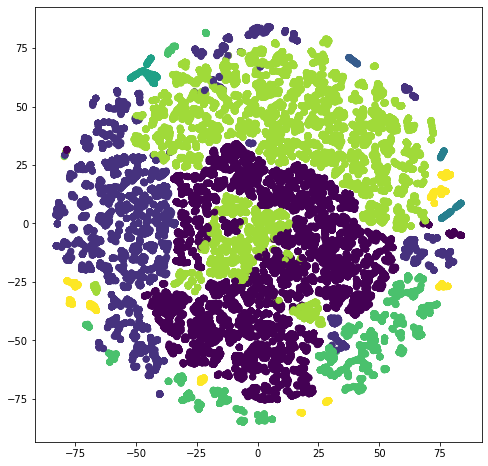

In [538]:
plt.figure(figsize=(8,8))
plt.scatter(vis_x, vis_y, c=clusters)

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42, stratify=y)

In [540]:
'''Apply starndardscaler on X_train then transform X_test'''

sc = StandardScaler()

X_train[col] = sc.fit_transform(X_train[col])
X_test[col] = sc.transform(X_test[col])

In [541]:
X_train.head()

,marital_status,no_of_children,segment,barnd_Established,barnd_Local,campaign_type,campaign_duration,sell_price,other_discount,coupon_discount
29980,0,2.469159,0.543856,-0.130010,0.026175,0,-1.168463,-0.214449,-0.650356,-0.278077
17011,0,-0.600695,-0.464732,-0.121399,-0.135278,0,0.399388,1.269404,1.339454,-0.278077
5581,0,-0.600695,-1.473320,-0.130010,-0.092224,0,0.399388,-0.166693,0.817375,-0.278077
43121,0,0.422589,-0.464732,-0.130010,-0.124515,0,0.399388,5.700496,10.106434,-0.278077
8757,0,1.445874,0.543856,-0.121399,-0.135278,1,0.351146,0.104494,0.305147,-0.278077


### This is a Binary classification problem, so the below are the best models could be used to handle it:

#### 1 - Logistic Regression
#### 2 - SVM
#### 3 - Random Forest
#### 4 - LGBM
#### 5 - Gradient Boosting Classifier

In [542]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20,30]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20,30]
        }
    },

    'lgbm' : {
        'model': LGBMClassifier(objective='binary',reg_alpha=2, learning_rate=0.01,is_unbalance=True),
        'params': {
            'n_estimators': [10,30,50,100]
        }
    },
    'g_boost' : {
        'model': GradientBoostingClassifier(learning_rate=0.01),
        'params': {
            'n_estimators': [10,30,50,100]
        }
    },

}

'''
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear']
        }  
    },
    
'''

"\n    'svm': {\n        'model': SVC(gamma='auto'),\n        'params' : {\n            'C': [1,10,20,30],\n            'kernel': ['rbf','linear']\n        }  \n    },\n    \n"

In [543]:
'''SVC has taken very long time to be excuted, so we excluded it from the list'''

scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

random_forest
logistic_regression
lgbm
g_boost


## As the per the below table logistic_regression gets the highest score among all models, however our data is highly imbalanced, so the accuracy itself will not be a good indecator
## We need to check classification report for each model

In [544]:
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df.sort_values('best_score', ascending= False)

,model,best_score,best_params
3,g_boost,0.986969,{'n_estimators': 100}
1,logistic_regression,0.986910,{'C': 1}
2,lgbm,0.986881,{'n_estimators': 10}
0,random_forest,0.985053,{'n_estimators': 30}


In [545]:
final_model_lr = LogisticRegression(solver='liblinear',multi_class='auto', C=1)
final_model_lr.fit(X_train, y_train)
y_pred = final_model_lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8501
           1       0.00      0.00      0.00       113

    accuracy                           0.99      8614
   macro avg       0.49      0.50      0.50      8614
weighted avg       0.97      0.99      0.98      8614



Text(33.0, 0.5, 'Truth')

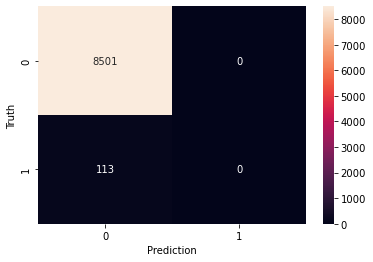

In [546]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [547]:
final_model_lgbm = LGBMClassifier(objective='binary',reg_alpha=2, learning_rate=0.01,is_unbalance=True, n_estimators=10)
final_model_lgbm.fit(X_train, y_train)
y_pred = final_model_lgbm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8501
           1       0.00      0.00      0.00       113

    accuracy                           0.99      8614
   macro avg       0.49      0.50      0.50      8614
weighted avg       0.97      0.99      0.98      8614



Text(33.0, 0.5, 'Truth')

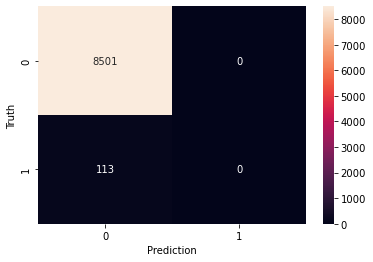

In [548]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [549]:
final_model_boost = GradientBoostingClassifier(learning_rate=0.01, n_estimators=10)
final_model_boost.fit(X_train, y_train)
y_pred = final_model_boost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8501
           1       0.00      0.00      0.00       113

    accuracy                           0.99      8614
   macro avg       0.49      0.50      0.50      8614
weighted avg       0.97      0.99      0.98      8614



Text(33.0, 0.5, 'Truth')

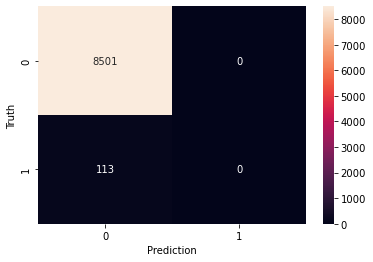

In [550]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [571]:
final_model_rf = RandomForestClassifier(random_state=0,n_estimators=9, max_depth=24,
                                        bootstrap= False,min_samples_split=3)
final_model_rf.fit(X_train, y_train)
y_pred = final_model_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8501
           1       0.23      0.12      0.16       113

    accuracy                           0.98      8614
   macro avg       0.61      0.56      0.58      8614
weighted avg       0.98      0.98      0.98      8614



In [552]:
names= X.columns
f_imp = sorted(zip(names, map(lambda x: round(x, 4), final_model_rf.feature_importances_)), 
               key=lambda x: x[1],
             reverse=True)

pd.DataFrame(f_imp)

,0,1
0,barnd_Established,0.4009
1,sell_price,0.1891
2,other_discount,0.1572
3,campaign_duration,0.0722
4,coupon_discount,0.0543
5,barnd_Local,0.0389
6,segment,0.0315
7,no_of_children,0.0271
8,marital_status,0.0176
9,campaign_type,0.0113


Text(33.0, 0.5, 'Truth')

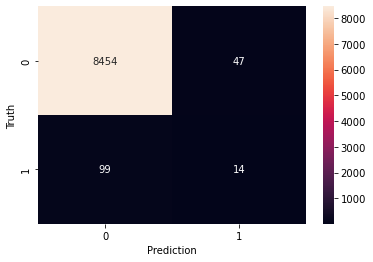

In [572]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [554]:
'''Chck SCV manually'''

final_model_scv = SVC(gamma='auto', kernel='sigmoid', C=50, max_iter=3)
final_model_rf.fit(X_train, y_train)
y_pred = final_model_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8501
           1       0.21      0.12      0.15       113

    accuracy                           0.98      8614
   macro avg       0.60      0.55      0.57      8614
weighted avg       0.98      0.98      0.98      8614



Text(33.0, 0.5, 'Truth')

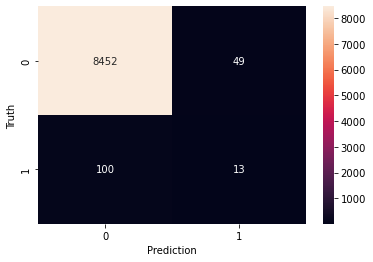

In [555]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## Till now RandomForestClassifier shows highes Precision and Recall  when it comes to positive output

In [104]:
df_ml.to_csv('df_ml_part.csv')

# Applying StratifiedKFold on RandomForestClassifier

In [103]:

def get_score(model, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)
    classification_report(y_test,y_pred)
    y_predict = model.predict(X_test)
    return model.score(X_test, y_test), y_predict




folds = StratifiedKFold(n_splits=3)


for train_index, test_index in folds.split(X_train, y_train):
    score = get_score(RandomForestClassifier(random_state=42,n_estimators=30, max_depth=50,
                                        bootstrap= False,min_samples_split=2), X_train, X_test, y_train, y_test)[0]
    y_predict = get_score(RandomForestClassifier(random_state=42,n_estimators=30, max_depth=50,
                                        bootstrap= False,min_samples_split=2), X_train, X_test, y_train, y_test)[1]
    print(scores)
    print(1)
    print(classification_report(y_test, y_predict))



[{'model': 'random_forest', 'best_score': 0.9848788274561022, 'best_params': {'n_estimators': 10}}, {'model': 'logistic_regression', 'best_score': 0.9869104629226527, 'best_params': {'C': 1}}, {'model': 'lgbm', 'best_score': 0.9868814395588448, 'best_params': {'n_estimators': 10}}, {'model': 'g_boost', 'best_score': 0.9869685096502685, 'best_params': {'n_estimators': 100}}]
1
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8501
           1       0.15      0.11      0.12       113

    accuracy                           0.98      8614
   macro avg       0.57      0.55      0.56      8614
weighted avg       0.98      0.98      0.98      8614

[{'model': 'random_forest', 'best_score': 0.9848788274561022, 'best_params': {'n_estimators': 10}}, {'model': 'logistic_regression', 'best_score': 0.9869104629226527, 'best_params': {'C': 1}}, {'model': 'lgbm', 'best_score': 0.9868814395588448, 'best_params': {'n_estimators': 10}}, {'model': '

## Getting the same maximum f1-score with 12% for postive output
## Recommeneded actions to enhance this score:

In [573]:
resampled_df_no = df_ml[df_ml.redemption_status == 0].sample(n=2500, random_state=0)
resampled_df_red = df_ml[df_ml.redemption_status == 1]

resampled_df = pd.concat([resampled_df_no, resampled_df_red])

In [576]:

resampled_X = resampled_df.drop(['redemption_status'], axis =1)
resampled_y = resampled_df['redemption_status']

X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, random_state=0)

In [581]:
resampled_df.columns

Index(['redemption_status', 'marital_status', 'no_of_children', 'segment',
       'barnd_Established', 'barnd_Local', 'campaign_type',
       'campaign_duration', 'sell_price', 'other_discount', 'coupon_discount'],
      dtype='object')

In [577]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [579]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       637
           1       0.64      0.45      0.52       130

    accuracy                           0.86       767
   macro avg       0.77      0.70      0.72       767
weighted avg       0.85      0.86      0.85       767



In [580]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
        
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)   
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       637
           1       0.64      0.45      0.52       130

    accuracy                           0.86       767
   macro avg       0.77      0.70      0.72       767
weighted avg       0.85      0.86      0.85       767



Text(33.0, 0.5, 'Truth')

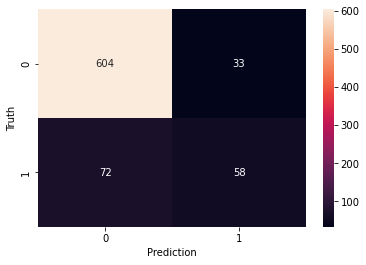

In [582]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### 1 - Reduce available columns and try to re-engineer the features 
### 2 - Try to apply NN model with sigmoid function  for output layer, to get binary classification output

# 

# -----------------------------------------------------------------------------------------------------------


# The differences between overfitting and underfitting

### Overfitting: Where the model gives high accuracy score in train dataset, with low predication score in train dataset

### Underfitting: Where the model gives low accuracy score in train dataset, with low predication score in train dataset

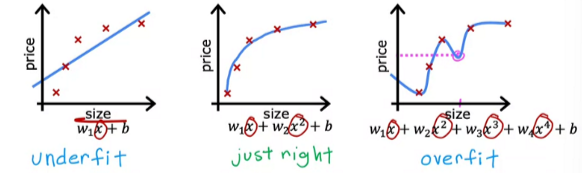

# How to avoid overfitting:

## We can use one or more of the below steps

### 1 - Collect more training data (m)
### 2 - Use fewer features by implementing "Feature Selection"
### 3 - Regularization which means reduce the size of parameters w without removing any features

# How to avoid underfitting:

### 1 - Increase model complexity
### 2 - Increase the number of features, performing feature engineering
### 3 - Increase the number of epochs or increase the duration of training to get better results

# 


# The End